In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
device="cpu"
ANS=[]

In [3]:
#Training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
#Testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15075281.87it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273004.88it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5039956.62it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8359379.40it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
class_name=train_data.classes
class_to_idx=train_data.class_to_idx

In [6]:
image, label=train_data[0]

In [7]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [8]:
class_name[label]

'Ankle boot'

In [9]:
#visualize our data

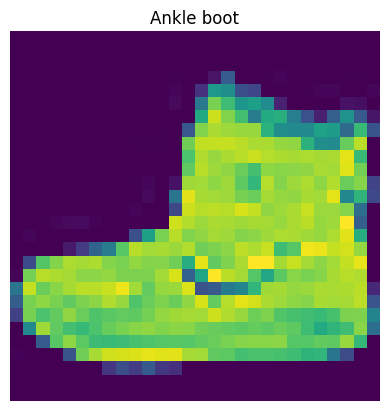

In [10]:
image, label=train_data[0]
plt.imshow(image.permute(1,2,0))
plt.title(class_name[label])
plt.axis(False)
plt.show()

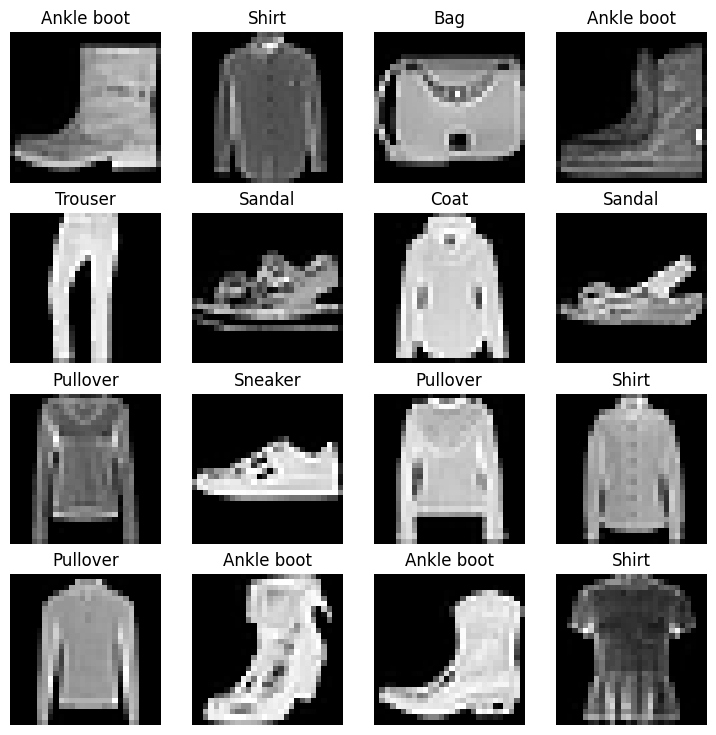

In [11]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
fig=plt.figure(figsize=(9,9))
row, col=4, 4
for i in range(1, row*col+1):
    random_number = torch.randint(0, len(train_data), (1,)).item()
    img, lab=train_data[random_number]
    fig.add_subplot(row, col, i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_name[lab])
    plt.axis(False)

In [12]:
BATCH_SIZE=32
from torch.utils.data import DataLoader
train_dataloader=DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader= DataLoader(dataset= test_data, batch_size=BATCH_SIZE)


In [13]:
train_feature_batch, train_label_batch=next(iter(train_dataloader))
print("Shape of the traing feature and lable")
print(train_feature_batch.shape, train_label_batch.shape)
test_feature_batch, test_label_batch=next(iter(test_dataloader))
print("Shape of the testing feature and lable")
print(test_feature_batch.shape,test_label_batch.shape)

Shape of the traing feature and lable
torch.Size([32, 1, 28, 28]) torch.Size([32])
Shape of the testing feature and lable
torch.Size([32, 1, 28, 28]) torch.Size([32])


In [14]:
print(f"Number of training data: {len(train_data)}")
print(f"Number of testing data: {len(test_data)}")
print(f"Number of batch in traing: {len(train_data)/train_feature_batch.shape[0]}")
print(f"Number of batch in testing: {len(test_data)/test_feature_batch.shape[0]}")
print(f"Length of train_dataloader:{len(train_dataloader)}")
print(f"Length of test_dataloader:{len(test_dataloader)}")

Number of training data: 60000
Number of testing data: 10000
Number of batch in traing: 1875.0
Number of batch in testing: 312.5
Length of train_dataloader:1875
Length of test_dataloader:313


Image_Size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


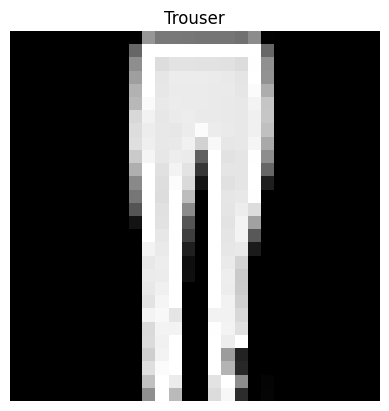

In [15]:
random_number = torch.randint(0, len(train_feature_batch), (1,)).item()
img, label=train_feature_batch[random_number], train_label_batch[random_number]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis(False)
print(f"Image_Size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [16]:
input = torch.randn(32, 1, 5, 5)
print(f"Input: {input.shape}")
m = nn.Flatten(0, 3)
output = m(input)
print(f"OutputSize: {output.size()}")
torch.Size([32, 25])
m = nn.Flatten(0, 2)
output = m(input)
output.size()

Input: torch.Size([32, 1, 5, 5])
OutputSize: torch.Size([800])


torch.Size([160, 5])

In [17]:
a = [[1, 2, 3], [4, 5, 6]]
t = torch.tensor(a)
m = nn.Flatten(0,-1)
# f_a=m(a)
f_t=m(t)
print(f"t: {t}")
print(f"t.shape: {t.shape}")
# print(f"f_a: {f_a}")
# print(f"f_a>shape: {f_a.shape}")
print(f"f_t: {f_t}")
print(f"f_t>shape: {f_t.shape}")

t: tensor([[1, 2, 3],
        [4, 5, 6]])
t.shape: torch.Size([2, 3])
f_t: tensor([1, 2, 3, 4, 5, 6])
f_t>shape: torch.Size([6])


In [18]:
#ModelV0 FOr the Fashion MNIST
class FashionMNISTv0(nn.Module):
    def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
        super().__init__()
        self.f1=nn.Flatten()
        self.l1=nn.Linear(in_features=input_shape, out_features=hidden_units)
        self.l2=nn.Linear(in_features=hidden_units, out_features=output_shape)
    def forward(self, x):
        return self.l2(self.l1(self.f1(x)))





In [19]:
model0=FashionMNISTv0(input_shape=28*28, hidden_units=10, output_shape=len(class_name))
model0

FashionMNISTv0(
  (f1): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=784, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=10, bias=True)
)

In [20]:
dummy_torch=torch.rand([1,1,28,28])
model0(dummy_torch).shape

torch.Size([1, 10])

In [21]:
import requests
from pathlib import Path
if Path("helper_function.py").is_file():
    print("Aleady in the file")
else:
    print("Dowloading Helper function")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py","wb") as f:
        f.write(request.content)

Dowloading Helper function


In [22]:
from helper_function import accuracy_fn

In [23]:
#Loss Function and optimizer
Loss= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(params=model0.parameters(), lr=0.01)

In [24]:
# Function to calculate the time to run the model
import time

def calculate_model_run_time(model, input_data):
    start_time = time.time()
    #_ = model(input_data)  # Assuming model is a callable object that takes input_data as input
    end_time = time.time()
    run_time = end_time - start_time
    return run_time

In [25]:
start_time = time.time()
from tqdm import tqdm
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n.....")
    ##Training
    train_loss=0
    for batch, (X_train,y_train) in enumerate(train_dataloader):
        model0.train()
        y_pred=model0(X_train)
        loss=Loss(y_pred, y_train)
        train_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at{batch*len(X_train)}/{len(train_data)} sample")
    train_loss/=len(train_dataloader)

    ###Testing
    test_loss, test_acc=0,0
    model0.eval()
    with torch.inference_mode():
        for (X_test, y_test) in test_dataloader:
            y_logit=model0(X_test)
            y_pred_test=torch.argmax(y_logit,dim=1)
            test_loss+=Loss(y_logit, y_test)
            test_acc+=accuracy_fn(y_test, y_pred_test)
        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
    print(f"Train_loss: {train_loss} || Test_loss: {test_loss} || Test_acc: {test_acc}")

end_time = time.time()

run_time = end_time - start_time
print(f"Total time: {run_time}")




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
.....
Looked at0/60000 sample
Looked at12800/60000 sample
Looked at25600/60000 sample
Looked at38400/60000 sample
Looked at51200/60000 sample


 33%|███▎      | 1/3 [00:30<01:00, 30.09s/it]

Train_loss: 0.5624402761459351 || Test_loss: 0.5092732310295105 || Test_acc: 81.9988019169329
Epoch: 1
.....
Looked at0/60000 sample
Looked at12800/60000 sample
Looked at25600/60000 sample
Looked at38400/60000 sample
Looked at51200/60000 sample


 67%|██████▋   | 2/3 [00:42<00:19, 19.63s/it]

Train_loss: 0.5021271705627441 || Test_loss: 0.4869379997253418 || Test_acc: 82.98722044728434
Epoch: 2
.....
Looked at0/60000 sample
Looked at12800/60000 sample
Looked at25600/60000 sample
Looked at38400/60000 sample
Looked at51200/60000 sample


100%|██████████| 3/3 [00:54<00:00, 18.17s/it]

Train_loss: 0.480909526348114 || Test_loss: 0.5648816227912903 || Test_acc: 81.01038338658147
Total time: 54.51326537132263


In [26]:
def eval_model(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            X_test=X_test.to(device)
            y_test=y_test.to(device)
            y_logit=model(X_test)
            y_pred= y_logit.argmax(dim=1)
            loss+=loss_fn(y_logit, y_test)
            acc+=accuracy_fn(y_test, y_pred)
        loss/=len(data_loader)
        acc/=len(data_loader)
    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }


In [27]:
device="cpu"
test_ans = eval_model(model0, test_dataloader, Loss, accuracy_fn, device)
ANS.append(test_ans)

## Experiment with Non-Linear layer

In [28]:
class FashionMNISTv1(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.F=nn.Flatten()
        self.L1=nn.Linear(in_features=input_shape, out_features=hidden_units)
        self.NL=nn.ReLU()
        self.L2=nn.Linear(in_features=hidden_units, out_features=output_shape)
    def forward(self, X: torch.Tensor)-> torch.Tensor:
        x=self.F(X)
        x=self.L1(x)
        x=self.NL(x)
        x=self.L2(x)
        x=self.NL(x)
        return x;


In [29]:
device= "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model1=FashionMNISTv1(input_shape=28*28, hidden_units=10, output_shape=10).to(device)
device

'cpu'

##Loss function and optimizer

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model1.parameters(), lr=0.01)

## Training Loop

In [31]:
Epochs=3
train_dataloader=train_dataloader
for epoch in tqdm(range(0,Epochs)):
    print(f"Epoch: {epoch}\n.....")
    loss=0
    for batch, (X_train, y_train) in enumerate(train_dataloader):
        X_train=X_train.to(device)
        y_train=y_train.to(device)
        y_logit=model1(X_train)
        y_pred=y_logit.argmax(dim=1)
        los=criterion(y_logit, y_train)
        loss+=los
        optimizer.zero_grad()
        los.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at{batch*len(X_train)}/{len(train_data)} sample")
    train_loss/=len(train_dataloader)
    loss/=len(train_dataloader)
    model1.eval()
    test_loss, test_acc=0,0
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test=X_test.to(device)
            y_test=y_test.to(device)
            y_logit_test=model1(X_test)
            y_pred_test=y_logit_test.argmax(dim=1)
            test_loss+=criterion(y_logit_test, y_test)
            test_acc+=accuracy_fn(y_test, y_pred_test)
        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
    print(f"Train_loss: {loss} Test_Loss: {test_loss} Test_acc: {test_acc}")





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
.....
Looked at0/60000 sample
Looked at12800/60000 sample
Looked at25600/60000 sample
Looked at38400/60000 sample
Looked at51200/60000 sample


 33%|███▎      | 1/3 [00:12<00:24, 12.29s/it]

Train_loss: 0.6309297680854797 Test_Loss: 0.5482093691825867 Test_acc: 80.66094249201278
Epoch: 1
.....
Looked at0/60000 sample
Looked at12800/60000 sample
Looked at25600/60000 sample
Looked at38400/60000 sample
Looked at51200/60000 sample


 67%|██████▋   | 2/3 [00:24<00:12, 12.27s/it]

Train_loss: 0.5153616070747375 Test_Loss: 0.5334231853485107 Test_acc: 81.49960063897764
Epoch: 2
.....
Looked at0/60000 sample
Looked at12800/60000 sample
Looked at25600/60000 sample
Looked at38400/60000 sample
Looked at51200/60000 sample


100%|██████████| 3/3 [00:36<00:00, 12.29s/it]

Train_loss: 0.497974693775177 Test_Loss: 0.5585033297538757 Test_acc: 81.10023961661342


In [32]:
test_ans = eval_model(model1, test_dataloader, Loss, accuracy_fn, device)


ANS.append(test_ans)

In [33]:
ANS

[{'model_name': 'FashionMNISTv0',
  'model_loss': 0.5648816227912903,
  'model_acc': 81.01038338658147},
 {'model_name': 'FashionMNISTv1',
  'model_loss': 0.5585033297538757,
  'model_acc': 81.10023961661342}]

In [34]:
len(ANS)

2

## Convolutional Layer


In [35]:
#torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)


class FashionMNISTv2(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv1_stack= nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2_stack= nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=output_shape,
                      kernel_size=2,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*64, ## There is trick to calculating this
                      out_features= output_shape
                      )


        )
    def forward(self, x):
        x=self.conv1_stack(x)
        #print(x.shape)
        x=self.conv2_stack(x)
        #print(x.shape)
        x=self.classifier(x)
        #print(x.shape)
        return x



In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model2=FashionMNISTv2(input_shape=1, hidden_units=10, output_shape=10)


## Setup the Loss function and Optimizer

In [42]:
from helper_function import accuracy_fn
loss=nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(params=model2.parameters(), lr=0.01)

## 4. Start training and Testing the Application

In [77]:
for batch, (X_train, y_train) in enumerate(train_dataloader):
        y_logit=model2(X_train) #traning
        print(y_logit.shape)
        break

torch.Size([32, 10])


In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=3
for epoch in tqdm(range(epochs)):
    l,a=0,0
    #print(f"Epoch: {epoch}\n.....")
    for batch, (X_train, y_train) in enumerate(train_dataloader):
        y_logit=model2(X_train) #traning
        y_pred=y_logit.argmax(1)
        lossy=loss(y_logit, y_train)  # calculate the loss
        l+=lossy
        optimizer.zero_grad()         # making the optimizer to zero
        lossy.backward()               #back propagation
        optimizer.step()
        if(batch%400==0):
            print(f"Looked at: {batch*len(X_train)}/ {len(train_data)} sample")            # Step taken by the optimizer
    l/=len(train_dataloader) # Here i am dividing it to calculate the loss for each batch
    test_loss, test_acc=0,0
    for X_test, y_test in test_dataloader:
        y_logit_pred= model2(X_test)
        y_pred_test=y_logit_pred.argmax(1)
        test_loss+=loss(y_logit_pred, y_test)
        test_acc+=accuracy_fn(y_test, y_pred_test)
    test_loss/=len(test_dataloader)     #Here i am divinding with the lenth of the test_loader because i have to calculate the loss for each batch
    test_acc/=len(test_dataloader)      # Here i am dividing with the length of the test loader to accuracy because i have to calculate the accuracy for each batch
    print(f"\nTrain_loss: {l} || Test-Loss: {test_loss} || Test-Acc: {test_acc}")



  0%|          | 0/3 [00:00<?, ?it/s]

Looked at: 0/ 60000 sample
Looked at: 12800/ 60000 sample
Looked at: 25600/ 60000 sample
Looked at: 38400/ 60000 sample
Looked at: 51200/ 60000 sample


 33%|███▎      | 1/3 [00:54<01:48, 54.24s/it]


Train_loss: 0.4841940999031067 || Test-Loss: 0.39789119362831116 || Test-Acc: 85.75279552715655
Looked at: 0/ 60000 sample
Looked at: 12800/ 60000 sample
Looked at: 25600/ 60000 sample
Looked at: 38400/ 60000 sample
Looked at: 51200/ 60000 sample


 67%|██████▋   | 2/3 [01:52<00:56, 56.66s/it]


Train_loss: 0.37229570746421814 || Test-Loss: 0.36761510372161865 || Test-Acc: 87.04073482428115
Looked at: 0/ 60000 sample
Looked at: 12800/ 60000 sample
Looked at: 25600/ 60000 sample
Looked at: 38400/ 60000 sample
Looked at: 51200/ 60000 sample


100%|██████████| 3/3 [02:46<00:00, 55.56s/it]


Train_loss: 0.35310861468315125 || Test-Loss: 0.3683141767978668 || Test-Acc: 86.63138977635782


In [44]:
ANS.append(eval_model(model2, test_dataloader, loss, accuracy_fn, device))

In [45]:
ANS

[{'model_name': 'FashionMNISTv0',
  'model_loss': 0.5648816227912903,
  'model_acc': 81.01038338658147},
 {'model_name': 'FashionMNISTv1',
  'model_loss': 0.5585033297538757,
  'model_acc': 81.10023961661342},
 {'model_name': 'FashionMNISTv2',
  'model_loss': 0.3683141767978668,
  'model_acc': 86.63138977635782}]

## 3. Make and Evaluate random predictions with best model

In [78]:
def make_prediction(model:torch.nn.Module,
                    data: list,
                    device: torch.device=device):
    pred_prob=[]
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample=torch.unsqueeze(sample, dim=0).to(device)
            pred_logit=model(sample)
            #Get the prediiction probabilities
            pred_proba=pred_logit.squeeze().softmax(dim=0)
            pred_prob.append(pred_proba.cpu())
    return torch.stack(pred_prob)


In [79]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [80]:
pred_prob=make_prediction(model2, test_samples)


In [83]:
pred_class=pred_prob.argmax(dim=1)
pred_class.shape

torch.Size([9])

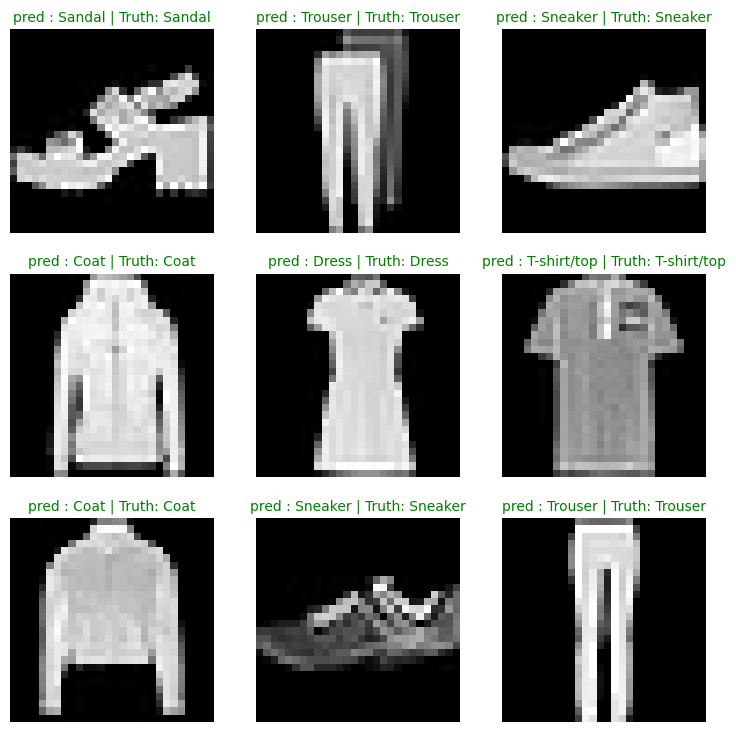

In [84]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label=class_name[pred_class[i]]
    truth_label=class_name[test_labels[i]]
    title_text=f"pred : {pred_label} | Truth: {truth_label}"
    if pred_label==truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

In [86]:
from tqdm.auto import tqdm

In [94]:
y_preds=[]
model2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc=" Making predictions......"):
        X,y= X.to(device), y.to(device)
        #print(X.shape)
        y_logit=model2(X)
        #print(y_logit.shape)
        y_pred=y_logit.softmax(1).argmax(1)
        y_preds.append(y_pred.cpu())


 Making predictions......:   0%|          | 0/313 [00:00<?, ?it/s]

In [101]:
len(y_preds), len(test_dataloader), len(test_data)/32
cat_y=torch.cat(y_preds)
print(len(y_preds))
print(len(cat_y))

313
10000


In [107]:
X_tests=[]
y_tests=[]
for X, y in test_data:
    X_tests.append(X)
    y_tests.append(y)

In [110]:
len(X_tests), len(y_tests)
type(X_tests), type(y_tests), type(cat_y)

(list, list, torch.Tensor)

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_tests, cat_y)

array([[843,   0,   9,  28,   4,   2, 102,   0,  12,   0],
       [  2, 965,   1,  21,   6,   0,   2,   0,   3,   0],
       [ 14,   0, 718,   7, 179,   0,  77,   0,   5,   0],
       [ 33,   2,  17, 848,  49,   0,  43,   0,   8,   0],
       [  1,   0,  23,  18, 887,   0,  67,   0,   4,   0],
       [  0,   0,   0,   0,   0, 977,   0,  15,   3,   5],
       [157,   3,  55,  23, 147,   0, 593,   0,  22,   0],
       [  0,   0,   0,   0,   0,  40,   0, 897,   2,  61],
       [  4,   2,   0,   3,   6,  10,   6,   1, 968,   0],
       [  0,   0,   0,   0,   0,  12,   2,  21,   0, 965]])

## Save the best modeL

In [112]:

from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


## Create new Instance and Load the model

In [116]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTv2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_name))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTv2(
  (conv1_stack): Sequential(
    (0): Conv2d(1, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_stack): Sequential(
    (0): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)